In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#한글설정
import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline
rc('font', family='AppleGothic')

plt.rcParams['axes.unicode_minus'] = False
import warnings
warnings.filterwarnings(action='ignore')

x1 : 경찰서접근성 Police station Accesibility
x2 : 고령인구 Elderly Population
x3 : 여자인구 Female Population
x4 : 유소년인구 Youth Population
x5 : 건축물수 Number of Builing
x6 : 사용승인일 Year
x7 : cctv 
x8 : light
pop 

In [12]:
df = pd.read_csv('성남시_격자_250_v2.csv',encoding='cp949')
df.rename(columns={'x1':'pa','x2':'ep','x3':'fp','x4':'yp','x5':'nb','x6':'year','x7':'cctv','x8':'light'},
         inplace=True)
df.head()

,gid,pa,ep,fp,yp,nb,year,cctv,light,pop
0,ㅼ궗58aa30ab,8.150,NaN,NaN,NaN,NaN,NaN,0,0,NaN
1,ㅼ궗58aa30ba,8.150,NaN,NaN,NaN,NaN,NaN,0,0,NaN
2,ㅼ궗58aa30bb,4.124,NaN,NaN,NaN,NaN,NaN,0,0,NaN
3,ㅼ궗58aa31aa,8.942,NaN,NaN,NaN,NaN,NaN,0,0,NaN
4,ㅼ궗58ab30ab,8.150,NaN,NaN,NaN,NaN,NaN,0,0,NaN


In [13]:
len(df)-df['pop'].isnull().sum()

1081

In [14]:
df_no=df[df['pop'].notnull()]

In [4]:
df.describe()

,pa,ep,fp,yp,nb,year,cctv,light,pop
count,2406.000000,998.000000,1033.000000,846.000000,1173.000000,1166.000000,2406.000000,2406.000000,1081.000000
mean,3.375064,155.861723,434.728945,105.555556,43.002558,2001.108671,0.650042,4.349543,823.033302
std,3.081830,181.606552,471.283486,110.288738,87.290827,10.198689,1.565126,13.908059,924.529553
min,0.134000,0.000000,0.000000,0.000000,1.000000,1919.500000,0.000000,0.000000,0.000000
25%,1.453000,14.000000,22.000000,18.000000,5.000000,1994.335000,0.000000,0.000000,31.000000
50%,2.437000,88.500000,254.000000,69.000000,14.000000,2001.000000,0.000000,0.000000,441.000000
75%,4.248000,237.000000,741.000000,163.750000,35.000000,2009.000000,1.000000,1.000000,1414.000000
max,31.435000,923.000000,2617.000000,638.000000,646.000000,2021.000000,22.000000,196.000000,4987.000000


## 빌딩수, 사용승인일이 NA이고, 전체인구가 존재하는 곳은 2023, median(nb)로 교체

In [15]:
df_no[df_no['nb'].isnull() & df_no['pop']>0]

,gid,pa,ep,fp,yp,nb,year,cctv,light,pop
66,ㅼ궗59ba30aa,6.339,0.0,0.0,0.0,NaN,NaN,0,3,6.0
447,ㅼ궗62ab35ba,4.883,NaN,NaN,NaN,NaN,NaN,0,0,7.0
599,ㅼ궗63ab31ba,3.518,NaN,9.0,NaN,NaN,NaN,0,0,9.0
868,ㅼ궗64ba37ab,1.453,0.0,6.0,NaN,NaN,NaN,0,1,13.0
953,ㅼ궗65aa30bb,5.624,188.0,576.0,169.0,NaN,NaN,0,0,1091.0
971,ㅼ궗65aa35ab,1.546,0.0,0.0,NaN,NaN,NaN,0,0,6.0
1011,ㅼ궗65ab30bb,1.590,251.0,564.0,127.0,NaN,NaN,0,0,1090.0
1032,ㅼ궗65ab36aa,1.591,0.0,0.0,NaN,NaN,NaN,0,3,6.0
1203,ㅼ궗66aa35ab,1.197,0.0,0.0,NaN,NaN,NaN,0,2,10.0
1856,ㅼ궗69aa32aa,3.370,0.0,57.0,30.0,NaN,NaN,0,0,113.0


In [27]:
df_no.loc[df_no['nb'].isnull() & df_no['pop']>0,'year'] = 2023
df_no.loc[df_no['nb'].isnull() & df_no['pop']>0,'nb'] = 14

In [697]:
df_no[df_no['nb'].isnull() & df_no['pop']>0]

,gid,pa,ep,fp,yp,nb,year,cctv,light,pop


In [10]:
df_no.isnull().sum()

gid      0
pa       0
ep       0
fp       0
yp       0
nb       0
year     0
cctv     0
light    0
pop      0
dtype: int64

In [5]:
df_no.dropna(subset='year',inplace=True)
df_no.fillna(0,inplace=True)
df_no.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 5 to 2341
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gid     1038 non-null   object 
 1   pa      1038 non-null   float64
 2   ep      1038 non-null   float64
 3   fp      1038 non-null   float64
 4   yp      1038 non-null   float64
 5   nb      1038 non-null   float64
 6   year    1038 non-null   float64
 7   cctv    1038 non-null   int64  
 8   light   1038 non-null   int64  
 9   pop     1038 non-null   float64
dtypes: float64(7), int64(2), object(1)
memory usage: 89.2+ KB


In [11]:
len(df_ok)

1038

In [7]:
df_ok=df_no.copy()
del df_ok['pop']

In [8]:
df_ok.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1038 entries, 5 to 2341
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   gid     1038 non-null   object 
 1   pa      1038 non-null   float64
 2   ep      1038 non-null   float64
 3   fp      1038 non-null   float64
 4   yp      1038 non-null   float64
 5   nb      1038 non-null   float64
 6   year    1038 non-null   float64
 7   cctv    1038 non-null   int64  
 8   light   1038 non-null   int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 81.1+ KB


In [9]:
df_ok.head()

,gid,pa,ep,fp,yp,nb,year,cctv,light
5,ㅼ궗58ab30ba,8.150,6.0,7.0,0.0,2.0,2002.50,0,3
17,ㅼ궗58bb30ab,7.768,0.0,0.0,0.0,2.0,1971.00,0,10
26,ㅼ궗59aa30aa,7.768,0.0,0.0,0.0,2.0,1985.50,0,5
27,ㅼ궗59aa30ab,7.768,0.0,0.0,0.0,3.0,1976.33,0,4
42,ㅼ궗59ab30aa,6.890,0.0,0.0,0.0,3.0,1938.00,1,2


In [538]:
df_ok.year

5       2002.50
17      1971.00
26      1985.50
27      1976.33
42      1938.00
         ...   
2310    2002.00
2312    2002.50
2313    2000.41
2314    2002.29
2341    2008.00
Name: year, Length: 1050, dtype: float64

In [30]:
df_ok['year']=df_ok['year'].astype(int)

각 변수의 정규분포를 따르는지 확인, (노령인구, 유소년인구, 여성인구 제외), cctv,보안등 개수 비교, 건물수 (2000년대 기준) 개수 비교

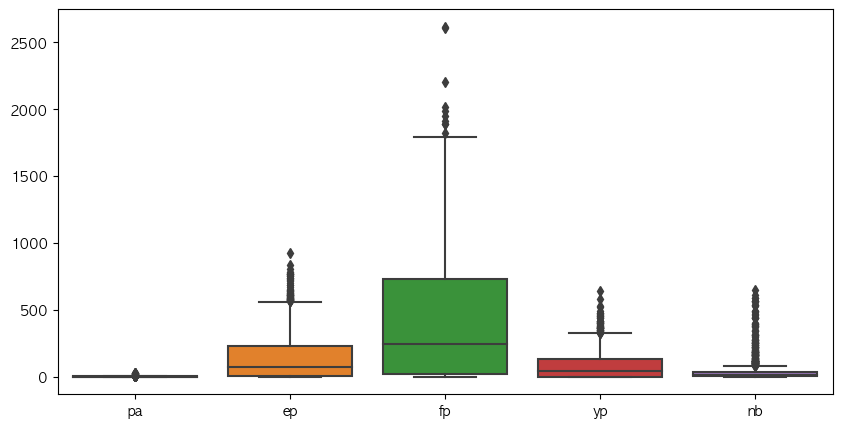

In [414]:
plt.figure(figsize=(10,5))
sns.boxplot([df_ok['pa'],df_ok['ep'],df_ok['fp'],df_ok['yp'],df_ok['nb']])
plt.xticks(np.arange(0,5),df.columns[1:6].tolist())
plt.show()

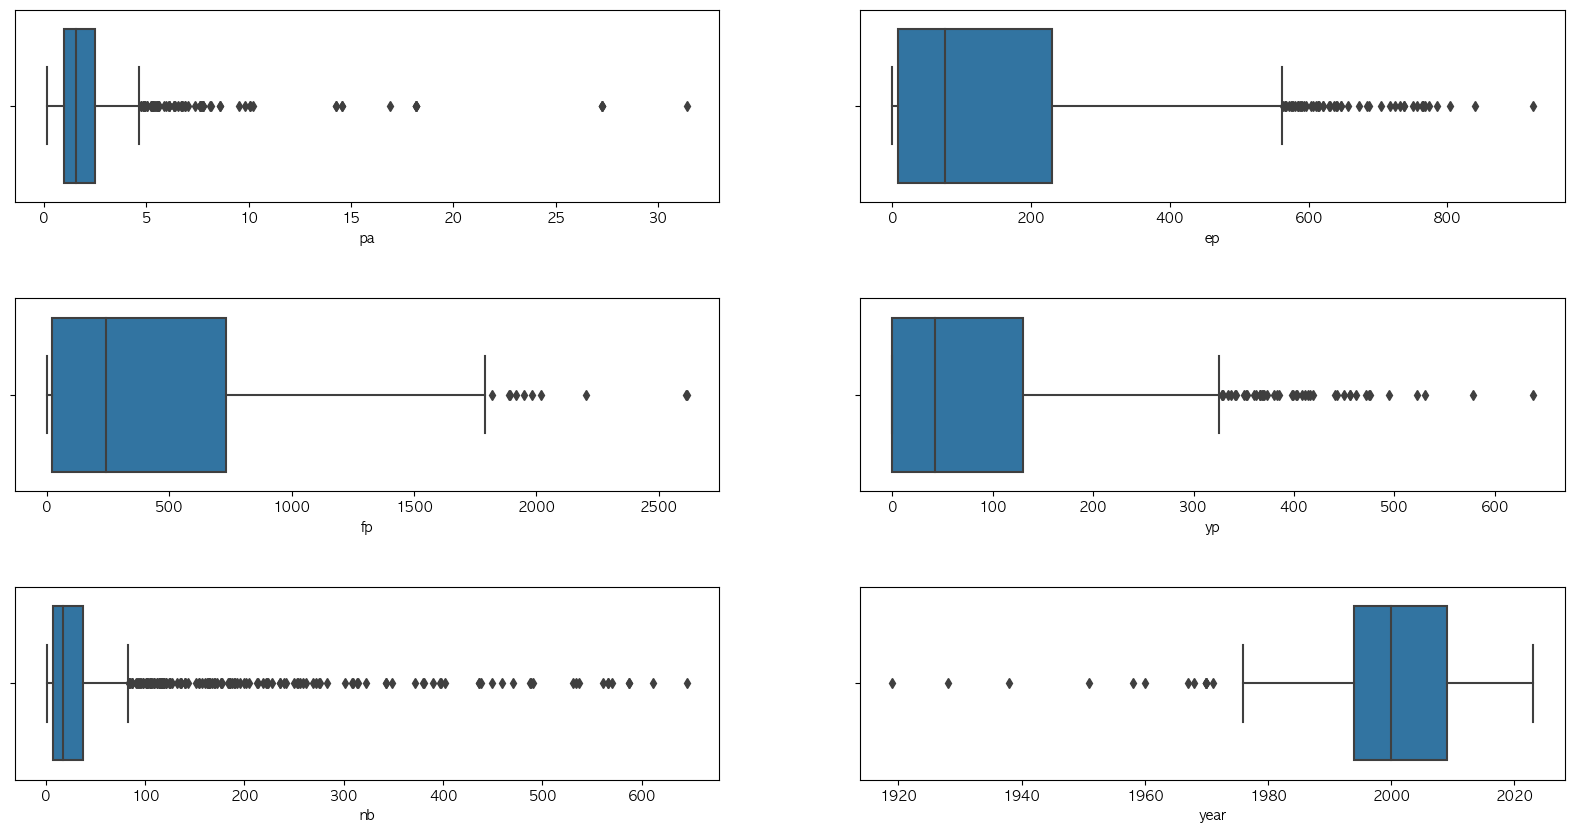

In [415]:
fig, ax = plt.subplots(ncols=2,nrows=3,figsize=(20,10))
fig.subplots_adjust(hspace=.5)

sns.boxplot(data=df_ok,x='pa',ax=ax[0,0])
sns.boxplot(data=df_ok,x='ep',ax=ax[0,1])
sns.boxplot(data=df_ok,x='fp',ax=ax[1,0])
sns.boxplot(data=df_ok,x='yp',ax=ax[1,1])
sns.boxplot(data=df_ok,x='nb',ax=ax[2,0])
sns.boxplot(data=df_ok,x='year',ax=ax[2,1])

plt.show()

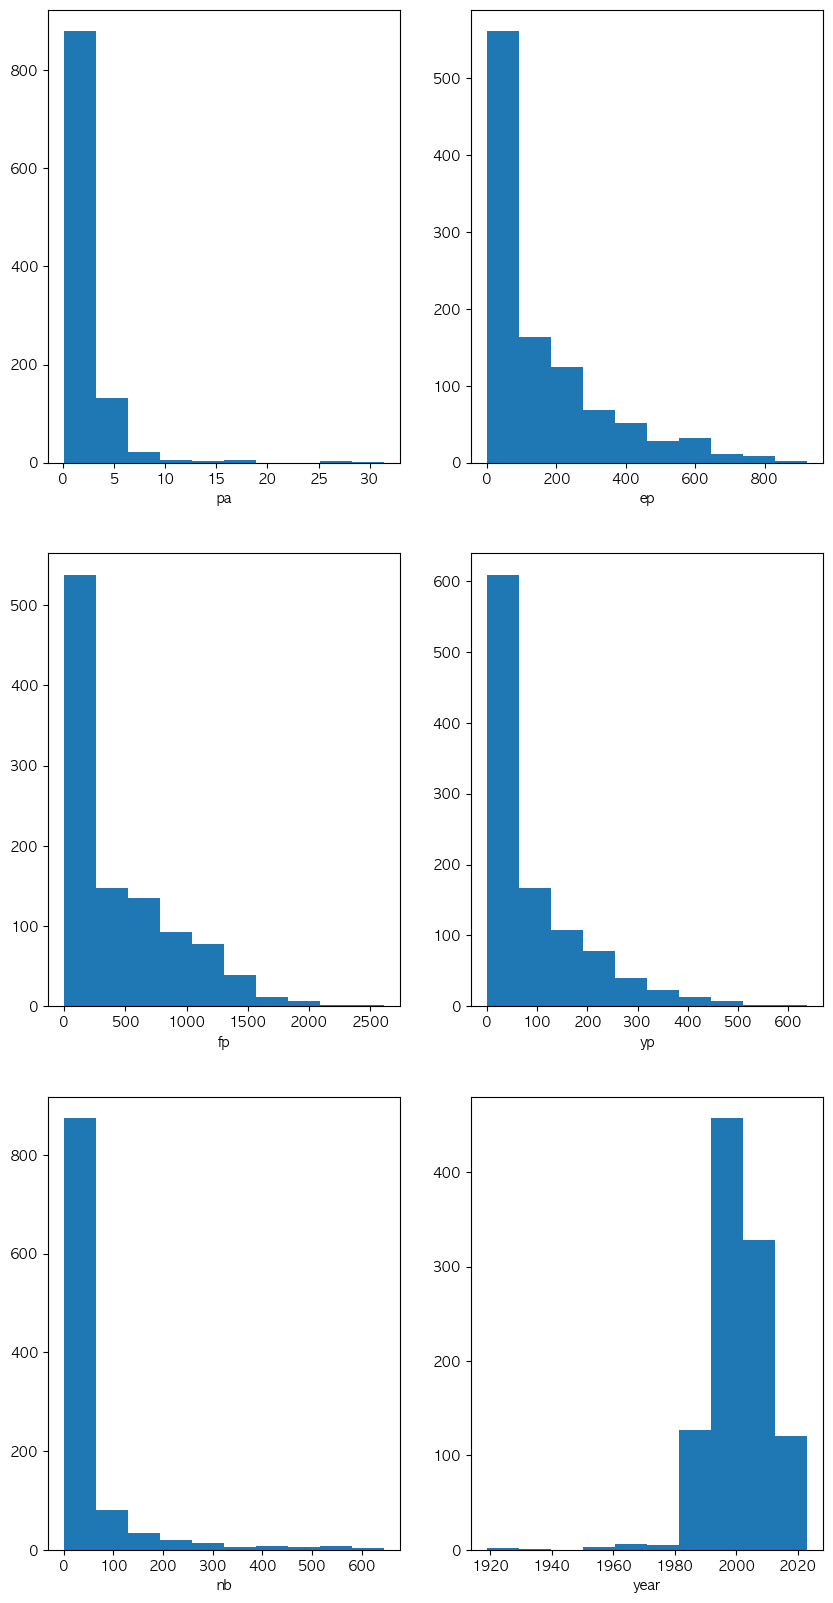

In [416]:
fig, ax = plt.subplots(ncols=2,nrows=3,figsize=(10,20))
# fig.subplots_adjust(hspace=.3)

ax[0,0].hist(data=df_ok,x='pa')
ax[0,0].set_xlabel("pa")

ax[0,1].hist(data=df_ok,x='ep')
ax[0,1].set_xlabel("ep")

ax[1,0].hist(data=df_ok,x='fp')
ax[1,0].set_xlabel("fp")

ax[1,1].hist(data=df_ok,x='yp')
ax[1,1].set_xlabel("yp")

ax[2,0].hist(data=df_ok,x='nb')
ax[2,0].set_xlabel("nb")

ax[2,1].hist(data=df_ok,x='year')
ax[2,1].set_xlabel("year")

plt.show()

첨도 : 0.05894626390749838
왜도 : 0.7276963263845606
shaprio : ShapiroResult(statistic=0.9885265827178955, pvalue=2.5692023086776317e-07)
normaltest : NormaltestResult(statistic=14.615140362531207, pvalue=0.0006704441322291886)


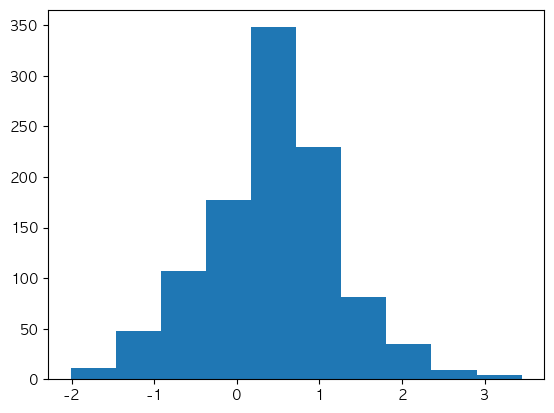

In [31]:
from scipy.stats import skew
from scipy.stats import kurtosis
from scipy.stats import shapiro
from scipy.stats import anderson
from scipy.stats import normaltest

df_ok['log_pa']=np.log(df_ok.pa)
print('첨도 :',skew(df_ok.log_pa))
print('왜도 :',kurtosis(df_ok.log_pa))
print('shaprio :',shapiro(df_ok.log_pa))
print('normaltest :',normaltest(df_ok.log_pa))

plt.hist(df_ok.log_pa)
plt.show()

첨도 : -0.17800198808226783
왜도 : -0.4228716060113533
shaprio : ShapiroResult(statistic=0.9841231107711792, pvalue=7.692216996701973e-08)
normaltest : NormaltestResult(statistic=13.876029726027374, pvalue=0.0009701936540778683)


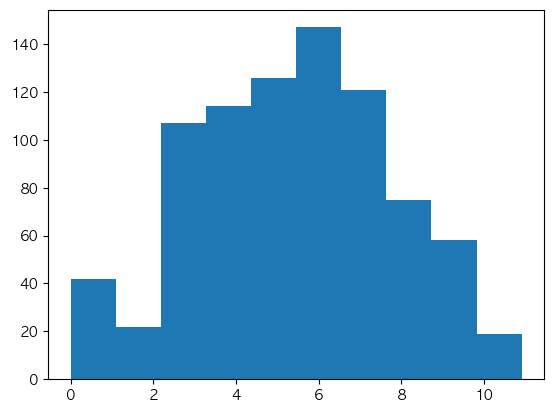

In [375]:
from scipy import stats
df_ok.ep_35 = df_ok.ep ** 0.35
print('첨도 :',skew(ep))
print('왜도 :',kurtosis(ep))
print('shaprio :',shapiro(ep))
print('normaltest :',normaltest(ep))
plt.hist(ep)
plt.show()

In [395]:
# df_ok.fp_t = df_ok.fp ** 0.3
# print('첨도 :',skew(df_ok.fp_t))
# print('왜도 :',kurtosis(df_ok.fp_t))
# print('shaprio :',shapiro(df_ok.fp_t))
# print('normaltest :',normaltest(df_ok.fp_t))

# plt.hist(df_ok.fp_t)
# plt.show()
len(df_ok[df_ok['fp']==0])


,gid,pa,ep,fp,yp,nb,year,cctv,light
17,ㅼ궗58bb30ab,7.768,0.0,0.0,0.0,2.0,1971,0,10
26,ㅼ궗59aa30aa,7.768,0.0,0.0,0.0,2.0,1985,0,5
27,ㅼ궗59aa30ab,7.768,0.0,0.0,0.0,3.0,1976,0,4
42,ㅼ궗59ab30aa,6.890,0.0,0.0,0.0,3.0,1938,1,2
43,ㅼ궗59ab30ab,6.890,0.0,0.0,0.0,2.0,1979,0,0
...,...,...,...,...,...,...,...,...,...
2280,ㅼ궗71ba37aa,2.254,0.0,0.0,0.0,15.0,1984,0,1
2282,ㅼ궗71ba37ba,0.994,0.0,0.0,0.0,11.0,1993,0,0
2295,ㅼ궗71ba40bb,1.882,0.0,0.0,0.0,1.0,1967,0,0
2310,ㅼ궗71bb37ba,2.050,0.0,0.0,0.0,1.0,2002,0,0


첨도 : 0.22394415352387087
왜도 : -0.6360048072155959
shaprio : ShapiroResult(statistic=0.9720175266265869, pvalue=1.5619710386216568e-11)
normaltest : NormaltestResult(statistic=37.481281476983526, pvalue=7.261780875814709e-09)


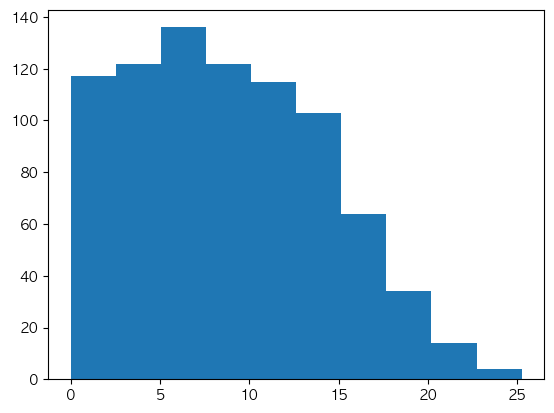

In [275]:
df_ok.yp_5 = df_ok.yp ** 0.5

print('첨도 :',skew(df_ok.yp_5))
print('왜도 :',kurtosis(df_ok.yp_5))
print('shaprio :',shapiro(df_ok.yp_5))
print('normaltest :',normaltest(df_ok.yp_5))

plt.hist(df_ok.yp_5)
plt.show()

첨도 : 0.13832828655666263
왜도 : -0.1367225757226409
shaprio : ShapiroResult(statistic=0.9843970537185669, pvalue=3.6493388311242825e-09)
normaltest : NormaltestResult(statistic=4.117540616023591, pvalue=0.1276107954242519)


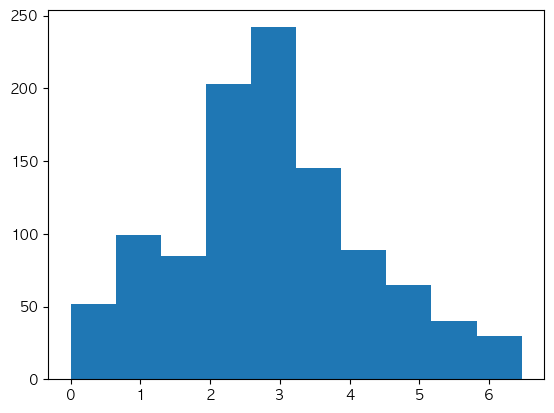

In [32]:
df_ok['log_nb'] = np.log(df_ok.nb)

print('첨도 :',skew(df_ok.log_nb))
print('왜도 :',kurtosis(df_ok.log_nb))
print('shaprio :',shapiro(df_ok.log_nb))
print('normaltest :',normaltest(df_ok.log_nb))

plt.hist(df_ok.log_nb)
plt.show()

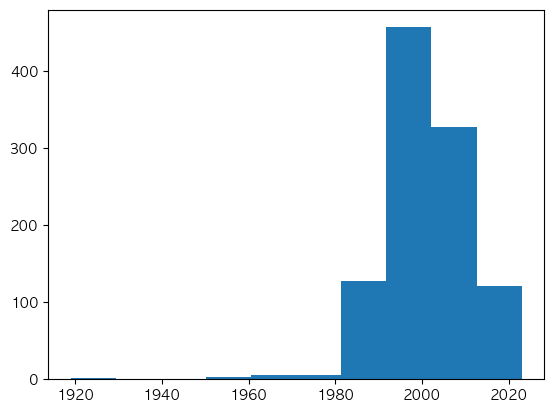

In [419]:
plt.hist(df_ok.year)
plt.show()

In [420]:
print(len(df_ok.year[(df_ok.year >= 2003)])) # 2000년대 이후, 이전 데이터 개수 차이 확인
print(len(df_ok.year[(df_ok.year < 2003)]))

449
601


In [33]:
df_ok.to_csv('prestd_data.csv',encoding='euc-kr')

## 범주형 변수로 변환

In [13]:
df_ok.loc[df_ok.year < 2003, 'year'] = 0 # 20년도 이상 노후화 건물 : 0
df_ok.loc[df_ok.year >= 2003, 'year'] = 1

In [16]:
df_ok

,gid,pa,ep,fp,yp,nb,year,cctv,light
5,ㅼ궗58ab30ba,8.150,6.0,7.0,0.0,2.0,0,0,3
17,ㅼ궗58bb30ab,7.768,0.0,0.0,0.0,2.0,0,0,10
26,ㅼ궗59aa30aa,7.768,0.0,0.0,0.0,2.0,0,0,5
27,ㅼ궗59aa30ab,7.768,0.0,0.0,0.0,3.0,0,0,4
42,ㅼ궗59ab30aa,6.890,0.0,0.0,0.0,3.0,0,1,2
...,...,...,...,...,...,...,...,...,...
2310,ㅼ궗71bb37ba,2.050,0.0,0.0,0.0,1.0,0,0,0
2312,ㅼ궗71bb38aa,2.050,82.0,230.0,54.0,4.0,0,2,3
2313,ㅼ궗71bb38ab,1.668,51.0,93.0,14.0,17.0,0,0,7
2314,ㅼ궗71bb38ba,1.434,19.0,50.0,8.0,7.0,0,4,2


(array([704., 212.,  89.,  24.,  10.,   5.,   4.,   0.,   1.,   1.]),
 array([ 0. ,  1.7,  3.4,  5.1,  6.8,  8.5, 10.2, 11.9, 13.6, 15.3, 17. ]),
 <BarContainer object of 10 artists>)

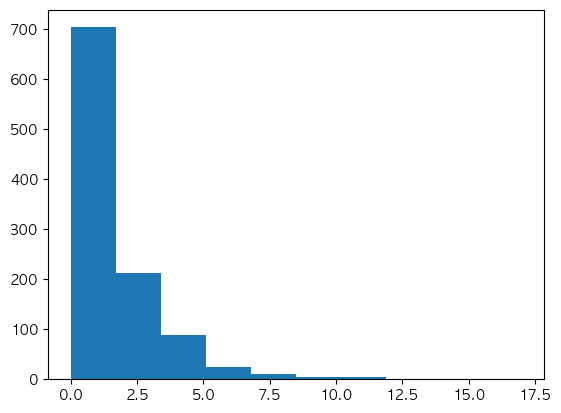

In [708]:
plt.hist(df_ok.cctv)

(array([486.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 564.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

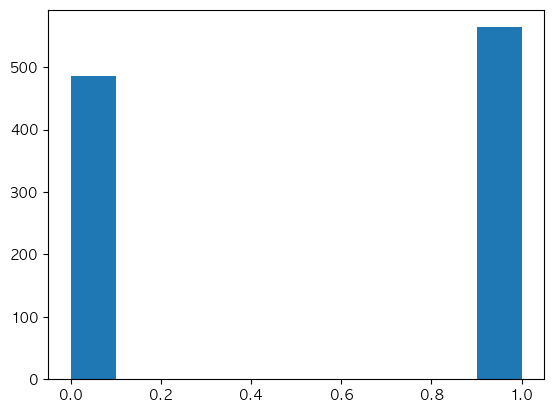

In [666]:
plt.hist(df_ok.light)

In [427]:
print(len(df_ok[df_ok.cctv==0]))
print(len(df_ok[df_ok.cctv!=0]))
print(len(df_ok[df_ok.light==0]))
print(len(df_ok[df_ok.light!=0]))

486
564
510
540


In [428]:
df_ok.cctv.value_counts()

0     486
1     218
2     131
3      81
4      46
5      43
6      24
7       6
8       4
11      4
10      3
9       2
15      1
17      1
Name: cctv, dtype: int64

In [22]:
df_ok.to_csv('dasi.csv',encoding='euc-kr')

In [17]:
df_ok.loc[df_ok.cctv == 0, 'cctv'] = 0
df_ok.loc[df_ok.cctv > 0, 'cctv'] = 1
df_ok.loc[df_ok.cctv == 0, 'light'] = 0
df_ok.loc[df_ok.cctv > 0, 'light'] = 1

In [20]:
df_ok.head()

,gid,pa,ep,fp,yp,nb,year,cctv,light
5,ㅼ궗58ab30ba,8.150,6.0,7.0,0.0,2.0,0,0,0
17,ㅼ궗58bb30ab,7.768,0.0,0.0,0.0,2.0,0,0,0
26,ㅼ궗59aa30aa,7.768,0.0,0.0,0.0,2.0,0,0,0
27,ㅼ궗59aa30ab,7.768,0.0,0.0,0.0,3.0,0,0,0
42,ㅼ궗59ab30aa,6.890,0.0,0.0,0.0,3.0,0,1,1


# year, cctv, light -> 연속형 데이터로 사용

In [743]:
df_ok['year'] = 2023-df_ok.year
df_ok

,gid,pa,ep,fp,yp,nb,year,cctv,light,log_pa,log_nb
5,ㅼ궗58ab30ba,8.150,6.0,7.0,0.0,2.0,21,0,3,2.098018,0.693147
17,ㅼ궗58bb30ab,7.768,0.0,0.0,0.0,2.0,52,0,10,2.050013,0.693147
26,ㅼ궗59aa30aa,7.768,0.0,0.0,0.0,2.0,38,0,5,2.050013,0.693147
27,ㅼ궗59aa30ab,7.768,0.0,0.0,0.0,3.0,47,0,4,2.050013,1.098612
42,ㅼ궗59ab30aa,6.890,0.0,0.0,0.0,3.0,85,1,2,1.930071,1.098612
...,...,...,...,...,...,...,...,...,...,...,...
2310,ㅼ궗71bb37ba,2.050,0.0,0.0,0.0,1.0,21,0,0,0.717840,0.000000
2312,ㅼ궗71bb38aa,2.050,82.0,230.0,54.0,4.0,21,2,3,0.717840,1.386294
2313,ㅼ궗71bb38ab,1.668,51.0,93.0,14.0,17.0,23,0,7,0.511625,2.833213
2314,ㅼ궗71bb38ba,1.434,19.0,50.0,8.0,7.0,21,4,2,0.360468,1.945910


In [748]:
df44 = df_ok.copy()

In [749]:
df44.drop(columns=['ep','fp','yp','pa','nb'],inplace=True)
df44

,gid,year,cctv,light
5,ㅼ궗58ab30ba,21,0,3
17,ㅼ궗58bb30ab,52,0,10
26,ㅼ궗59aa30aa,38,0,5
27,ㅼ궗59aa30ab,47,0,4
42,ㅼ궗59ab30aa,85,1,2
...,...,...,...,...
2310,ㅼ궗71bb37ba,21,0,0
2312,ㅼ궗71bb38aa,21,2,3
2313,ㅼ궗71bb38ab,23,0,7
2314,ㅼ궗71bb38ba,21,4,2


In [750]:
df2 = df_ok[['ep','fp','yp']]
df2

,log_pa,ep,fp,yp,log_nb
5,2.098018,6.0,7.0,0.0,0.693147
17,2.050013,0.0,0.0,0.0,0.693147
26,2.050013,0.0,0.0,0.0,0.693147
27,2.050013,0.0,0.0,0.0,1.098612
42,1.930071,0.0,0.0,0.0,1.098612
...,...,...,...,...,...
2310,0.717840,0.0,0.0,0.0,0.000000
2312,0.717840,82.0,230.0,54.0,1.386294
2313,0.511625,51.0,93.0,14.0,2.833213
2314,0.360468,19.0,50.0,8.0,1.945910


In [751]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df2_std = scaler.fit_transform(df2)
df2_std = pd.DataFrame(df2_std, columns=['ep','fp','yp'])

# 결과 확인
df2_std.head()
# df_ok.drop(columns=['pa','ep','fp','yp','nb'],inplace=True)
# df_ok = pd.concat([df_ok, df2_std], axis=1)

,log_pa,ep,fp,yp,log_nb
0,1.795010,-0.316027,-0.331228,-0.323077,-1.270062
1,1.742831,-0.343115,-0.341053,-0.323077,-1.270062
2,1.742831,-0.343115,-0.341053,-0.323077,-1.270062
3,1.742831,-0.343115,-0.341053,-0.323077,-1.029431
4,1.612460,-0.343115,-0.341053,-0.323077,-1.029431


In [752]:
df44.reset_index(inplace=True,drop=True)
# df44.drop(columns='index',inplace=True)
df44

,gid,year,cctv,light
0,ㅼ궗58ab30ba,21,0,3
1,ㅼ궗58bb30ab,52,0,10
2,ㅼ궗59aa30aa,38,0,5
3,ㅼ궗59aa30ab,47,0,4
4,ㅼ궗59ab30aa,85,1,2
...,...,...,...,...
1045,ㅼ궗71bb37ba,21,0,0
1046,ㅼ궗71bb38aa,21,2,3
1047,ㅼ궗71bb38ab,23,0,7
1048,ㅼ궗71bb38ba,21,4,2


In [753]:
df_ok = pd.concat([df44, df2_std], axis=1)

In [754]:
df_ok

,gid,year,cctv,light,log_pa,ep,fp,yp,log_nb
0,ㅼ궗58ab30ba,21,0,3,1.795010,-0.316027,-0.331228,-0.323077,-1.270062
1,ㅼ궗58bb30ab,52,0,10,1.742831,-0.343115,-0.341053,-0.323077,-1.270062
2,ㅼ궗59aa30aa,38,0,5,1.742831,-0.343115,-0.341053,-0.323077,-1.270062
3,ㅼ궗59aa30ab,47,0,4,1.742831,-0.343115,-0.341053,-0.323077,-1.029431
4,ㅼ궗59ab30aa,85,1,2,1.612460,-0.343115,-0.341053,-0.323077,-1.029431
...,...,...,...,...,...,...,...,...,...
1045,ㅼ궗71bb37ba,21,0,0,0.294818,-0.343115,-0.341053,-0.323077,-1.681423
1046,ㅼ궗71bb38aa,21,2,3,0.294818,0.027088,-0.018246,0.092308,-0.858701
1047,ㅼ궗71bb38ab,23,0,7,0.070672,-0.112867,-0.210526,-0.215385,0.000000
1048,ㅼ궗71bb38ba,21,4,2,-0.093630,-0.257336,-0.270877,-0.261538,-0.526587


In [755]:
df_ok.to_csv('data_con.csv',encoding='euc-kr')

In [721]:
df = df_ok.drop(columns='gid')
df.head()

,year,cctv,light,log_pa,ep,fp,yp,log_nb
0,0,0,0,1.795010,-0.316027,-0.331228,-0.323077,-1.270062
1,0,0,0,1.742831,-0.343115,-0.341053,-0.323077,-1.270062
2,0,0,0,1.742831,-0.343115,-0.341053,-0.323077,-1.270062
3,0,0,0,1.742831,-0.343115,-0.341053,-0.323077,-1.029431
4,0,1,1,1.612460,-0.343115,-0.341053,-0.323077,-1.029431


## Clustering analysis

In [513]:
from sklearn.cluster import KMeans, MiniBatchKMeans
from sklearn.metrics import silhouette_score

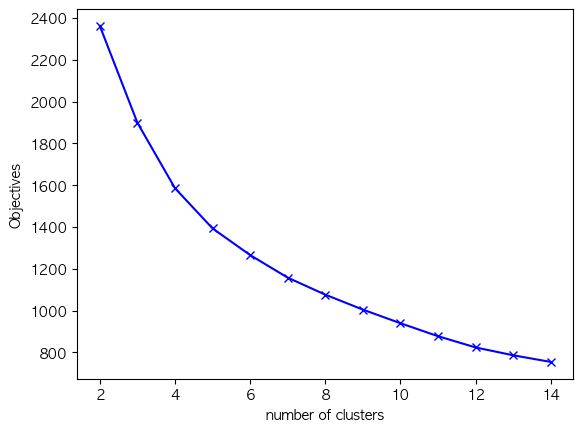

In [722]:
Objectives = []
K = range(2,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df)
    Objectives.append(km.inertia_)

plt.plot(K, Objectives, 'bx-')
plt.xlabel('k')
plt.ylabel('Objectives')
plt.xlabel('number of clusters')
plt.show() 

In [633]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score 
km = KMeans(n_clusters=4)
km = km.fit(df)
silhouette_score(df, km.labels_, metric='euclidean')

0.28525088987946334

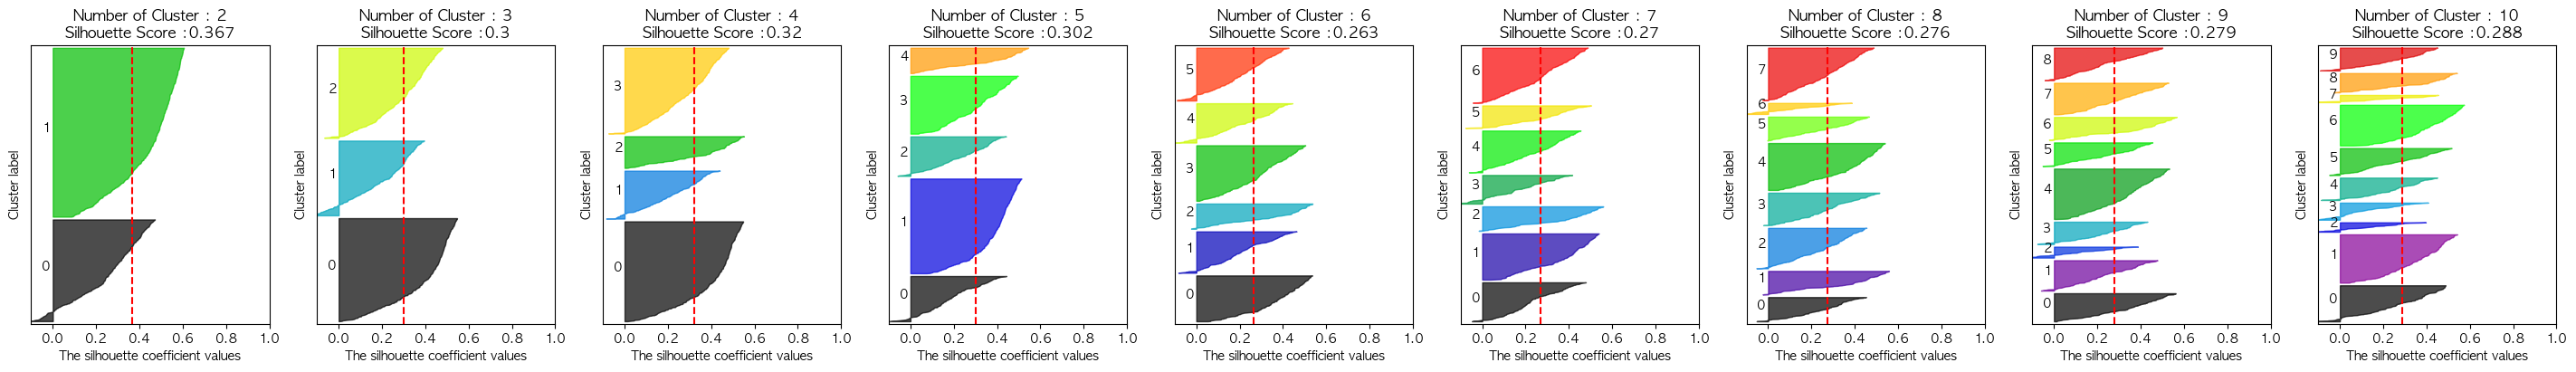

In [723]:
import math
import matplotlib.cm as cm
import matplotlib.pyplot as plt
def visualize_silhouette(cluster_lists, X_features):     
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")

visualize_silhouette([2, 3, 4, 5, 6, 7, 8, 9, 10], df)

In [724]:
km = KMeans(n_clusters=4)
km = km.fit(df)
df4 = df.copy()
df4['label']=km.labels_

In [725]:
df4.label.value_counts()

1    395
0    339
2    190
3    126
Name: label, dtype: int64

In [726]:
df4['gid']=df_ok.gid
df4.to_csv('df4_kmeans_cat.csv',encoding='euc-kr',index=False)

In [727]:
km = KMeans(n_clusters=5)
km = km.fit(df)
df5 = df.copy()
df5['label']=km.labels_

In [728]:
df5.label.value_counts()

1    375
0    231
3    181
2    158
4    105
Name: label, dtype: int64

In [729]:
df5['gid']=df_ok.gid
df5.to_csv('df5_kmeans_cat.csv',encoding='euc-kr')

In [730]:
km = KMeans(n_clusters=6)
km = km.fit(df)
df6 = df.copy()
df6['label']=km.labels_

In [731]:
df6.label.value_counts()

4    224
0    209
5    189
2    167
1    159
3    102
Name: label, dtype: int64

In [732]:
df6['gid']=df_ok.gid
df6.to_csv('df6_kmeans_cat.csv',encoding='euc-kr')

In [ ]:
########